In [54]:
import pandas as pd
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt

In [2]:
os.listdir()

['.ipynb_checkpoints', 'titanicTrain.csv', 'Untitled.ipynb']

In [3]:
tit = pd.read_csv('titanicTrain.csv')

In [11]:
tit = tit.dropna(axis=0, how='all')

In [12]:
columns = tit.columns

In [49]:
# ignore the columns with most null value
null_n = np.zeros(len(columns)).astype(np.int32)
for i,c in enumerate(columns):
    null_n[i] = tit[c].isnull().values.sum()
    print(c + ' : ' + str(null_n[i]))
drop_col = (null_n.argsort()[-4:][::-1])

pclass : 0
survived : 0
name : 0
sex : 0
age : 139
sibsp : 0
parch : 0
ticket : 0
fare : 0
cabin : 717
embarked : 2
boat : 583
body : 905
home.dest : 258


In [52]:
for dc in drop_col:
    tit = tit.drop(columns[dc], axis = 1)
tit

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,S
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,S
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,S
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,S
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,C


In [58]:
tit = tit.fillna(0)

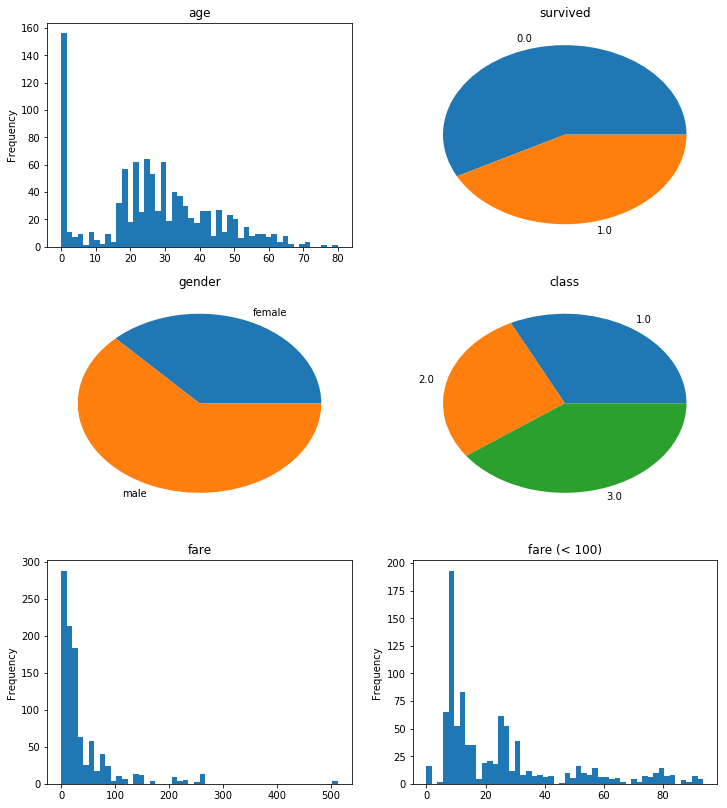

In [63]:
fig, axs = plt.subplots(3, 2, squeeze=False, figsize=(12, 14))
tit.age.plot.hist(bins=50, title='age', ax=axs[0, 0])
tit.groupby('survived').agg('count')['age'].plot.pie(title='survived', ax=axs[0, 1])
axs[0, 1].set_ylabel('')
tit.groupby('sex').agg('count')['age'].plot.pie(title='gender', ax=axs[1, 0])
axs[1, 0].set_ylabel('')
tit.groupby('pclass').agg('count')['age'].plot.pie(title='class', ax=axs[1, 1])
axs[1, 1].set_ylabel('')
fare = tit.fare
fare.plot.hist(bins=50, title='fare', ax=axs[2, 0])
fare[fare < 100].plot.hist(bins=50, title='fare (< 100)', ax=axs[2, 1])
plt.show()

In [75]:
tit['child'] = tit.apply(lambda row: 1 if row['age'] < 15 else 0, axis=1)

In [73]:
sex_group = tit[['sex', 'survived']].groupby('sex')
sex_agg = sex_group.agg(['sum', 'count'])['survived']
print(sex_agg)
sex_agg['per'] = sex_agg['sum']/sex_agg['count']
print(sex_agg)

          sum  count
sex                 
female  290.0    371
male    133.0    629
          sum  count       per
sex                           
female  290.0    371  0.781671
male    133.0    629  0.211447


In [81]:
child_group = tit[['child', 'survived']].groupby('child')
child_agg = child_group.agg(['sum', 'count'])['survived']
print(child_agg)
child_agg['per'] = child_agg['sum']/child_agg['count']
print(child_agg)

         sum  count
child              
0      331.0    789
1       92.0    211
         sum  count       per
child                        
0      331.0    789  0.419518
1       92.0    211  0.436019


In [84]:
pclass_group = tit[['pclass', 'survived']].groupby('pclass')
pclass_agg = pclass_group.agg(['sum', 'count'])['survived']
print(pclass_agg)
pclass_agg['per'] = pclass_agg['sum']/pclass_agg['count']
print(pclass_agg)

          sum  count
pclass              
1.0     200.0    323
2.0     119.0    277
3.0     104.0    400
          sum  count       per
pclass                        
1.0     200.0    323  0.619195
2.0     119.0    277  0.429603
3.0     104.0    400  0.260000


In [90]:
parch_group = tit[['parch', 'survived']].groupby('parch')
parch_agg = parch_group.agg(['sum', 'count'])['survived']
print(parch_agg)
parch_agg['per'] = parch_agg['sum']/parch_agg['count']
print(parch_agg)

         sum  count
parch              
0.0    279.0    762
1.0     85.0    130
2.0     52.0     91
3.0      5.0      8
4.0      1.0      3
5.0      1.0      4
6.0      0.0      2
         sum  count       per
parch                        
0.0    279.0    762  0.366142
1.0     85.0    130  0.653846
2.0     52.0     91  0.571429
3.0      5.0      8  0.625000
4.0      1.0      3  0.333333
5.0      1.0      4  0.250000
6.0      0.0      2  0.000000


In [92]:
sibsp_group = tit[['sibsp', 'survived']].groupby('sibsp')
sibsp_agg = sibsp_group.agg(['sum', 'count'])['survived']
print(sibsp_agg)
sibsp_agg['per'] = sibsp_agg['sum']/sibsp_agg['count']
print(sibsp_agg)

         sum  count
sibsp              
0.0    256.0    667
1.0    142.0    270
2.0     16.0     34
3.0      6.0     11
4.0      3.0     12
5.0      0.0      6
         sum  count       per
sibsp                        
0.0    256.0    667  0.383808
1.0    142.0    270  0.525926
2.0     16.0     34  0.470588
3.0      6.0     11  0.545455
4.0      3.0     12  0.250000
5.0      0.0      6  0.000000


### As we can see, [sex, pclass, parch, sibsp, age] is meaningful. 

In [87]:
tit['sex_n'] = tit['sex'].apply(lambda x: 0 if x =='male' else 1)
tit.drop('sex', axis=1)

,pclass,survived,name,age,sibsp,parch,ticket,fare,embarked,Child,child,sex_n
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",29.0000,0.0,0.0,24160,211.3375,S,0,0,1
1,1.0,1.0,"Allison, Master. Hudson Trevor",0.9167,1.0,2.0,113781,151.5500,S,1,1,0
2,1.0,0.0,"Allison, Miss. Helen Loraine",2.0000,1.0,2.0,113781,151.5500,S,1,1,1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1.0,2.0,113781,151.5500,S,0,0,0
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1.0,2.0,113781,151.5500,S,0,0,1
5,1.0,1.0,"Anderson, Mr. Harry",48.0000,0.0,0.0,19952,26.5500,S,0,0,0
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",63.0000,1.0,0.0,13502,77.9583,S,0,0,1
7,1.0,0.0,"Andrews, Mr. Thomas Jr",39.0000,0.0,0.0,112050,0.0000,S,0,0,0
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",53.0000,2.0,0.0,11769,51.4792,S,0,0,1
9,1.0,0.0,"Artagaveytia, Mr. Ramon",71.0000,0.0,0.0,PC 17609,49.5042,C,0,0,0


In [94]:
use_col = ['sex_n', 'pclass', 'parch', 'sibsp', 'age']

In [98]:
X = tit[use_col].as_matrix()
y = tit['survived'].as_matrix()

In [105]:
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn import preprocessing
preprocessed_X = preprocessing.normalize(preprocessing.scale(X))
print(preprocessed_X.shape)

(1000, 5)


In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(preprocessed_X, y, test_size=0.33, random_state=42)

In [115]:
my_pca = PCA(n_components=2)

#missing feature scaling and normalization
my_pca.fit(preprocessed_train)
train_X_PCA = my_pca.transform(X_train)
test_X_PCA = my_pca.transform(X_test)

# PCA

In [116]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(train_X_PCA, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [117]:
predict_y = clf.predict(test_X_PCA)
acc = (y_test == predict_y).mean()
print(acc)

0.751515151515


# normal

In [118]:
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(X_train, y_train)
predict_y = clf.predict(X_test)
acc = (y_test == predict_y).mean()
print(acc)

0.733333333333
